In [57]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [58]:
sample_dict = joblib.load('sample_dict')

In [59]:
_slice = 'C11'
pvalue = 1e-30
log2fc = 0.5

In [60]:
astro_nt = joblib.load(f'result/Astro-NT NN_deg_result')[_slice]
astro_te = joblib.load(f'result/Astro-TE NN_deg_result')[_slice]

In [61]:
leg = sample_dict[_slice]
astro_nt[f'log2_18mo_2mo'] = np.log2((astro_nt[f"{leg[2]}"] + 0.001)/(astro_nt[f"{leg[0]}"] + 0.001))
astro_nt_deg_df = astro_nt[(astro_nt['fdr'] < pvalue) & (abs(astro_nt['log2_18mo_2mo']) > log2fc)]

astro_te[f'log2_18mo_2mo'] = np.log2((astro_te[f"{leg[2]}"] + 0.001)/(astro_te[f"{leg[0]}"] + 0.001))
astro_te_deg_df = astro_te[(astro_te['fdr'] < pvalue) & (abs(astro_te['log2_18mo_2mo']) > log2fc)]




In [62]:
shared  = astro_nt_deg_df.index.intersection(astro_te_deg_df.index)
shared

Index(['C4b'], dtype='object', name='gene')

In [63]:
astro_nt_deg_df.loc[~astro_nt_deg_df.index.isin(shared)].sort_values('fdr')

,stats,fdr,C11-2mo,C11-9mo-repeat,C11-18mo,C11-2mo.C11-18mo.fdr,C11-2mo.C11-9mo-repeat.fdr,C11-9mo-repeat.C11-18mo.fdr,log2_18mo_2mo
gene,,,,,,,,,
Mobp,485.980679,2.462947e-104,0.572271,0.252716,0.308056,9.995575e-01,8.929422e-01,8.034093e-01,-0.891346
Nkx6-2,453.196103,2.429946e-97,0.110685,0.336425,0.170161,9.995575e-01,8.636027e-01,8.279788e-01,0.615923
Sfi1,287.988447,1.039789e-61,0.045089,0.129180,0.090223,8.210410e-08,3.462055e-24,1.120875e-02,0.984959
Chst8,281.791621,2.150829e-60,0.061176,0.166542,0.106173,9.995575e-01,6.440486e-01,6.454129e-01,0.785509
Cfap54,172.292204,4.832070e-37,0.051608,0.113093,0.076990,3.260208e-02,3.977227e-24,5.288799e-09,0.568005
Neat1,167.422917,5.129525e-36,0.549472,0.784594,0.782273,9.995575e-01,6.292405e-01,6.887163e-01,0.508846
Irf1,152.990626,6.127475e-33,0.021064,0.060097,0.038133,6.576322e-02,7.037464e-10,4.488719e-17,0.826669


In [64]:
astro_te_deg_df.loc[~astro_te_deg_df.index.isin(shared)]

,stats,fdr,C11-2mo,C11-9mo-repeat,C11-18mo,C11-2mo.C11-9mo-repeat.fdr,C11-2mo.C11-18mo.fdr,C11-9mo-repeat.C11-18mo.fdr,log2_18mo_2mo
gene,,,,,,,,,
Hrh1,276.899388,2.068994e-59,0.116827,0.180688,0.081519,7.141873e-01,0.996545,5.895628e-01,-0.513865
Tctn1,245.580543,1.070064e-52,0.020422,0.067140,0.032265,3.126204e-06,0.227109,4.116922e-02,0.634872
Dner,210.135345,4.038885e-45,0.420709,0.444780,0.284139,1.354809e-21,0.984758,3.013578e-15,-0.564584
Maml3,182.293421,3.517668e-39,0.020595,0.062013,0.033399,7.908305e-01,0.996545,5.413208e-01,0.671658


In [65]:
astro_te.loc[:,'-log10(p)'] = -np.log10(astro_te['fdr'])
astro_nt.loc[:,'-log10(p)'] = -np.log10(astro_nt['fdr'])

In [66]:
toplot= pd.concat([astro_te['-log10(p)'], astro_nt['-log10(p)']], axis = 1)
toplot.columns =['TE', 'NT']

<AxesSubplot: xlabel='TE', ylabel='NT'>

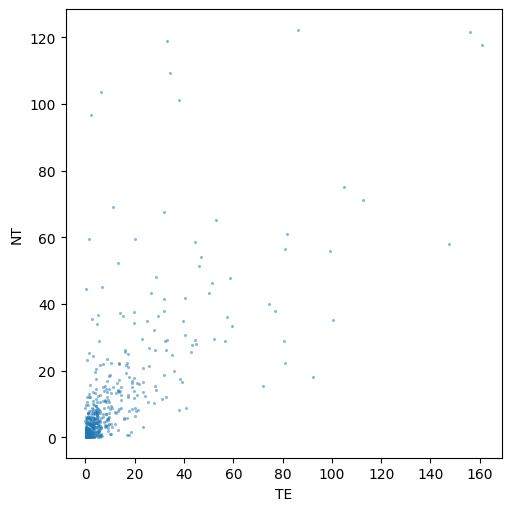

In [67]:
fig, ax = plt.subplots(figsize = (5,5), dpi = 100, constrained_layout = True)
sns.scatterplot(data = toplot, 
                s= 5, linewidth = 0, alpha = 0.5, 
                x = 'TE', 
                y = 'NT')

In [68]:
# select those with TE < 20 but NT > 5-
toplot[(toplot['TE'] < 20) & (toplot['NT'] > 40)]

,TE,NT
gene,,
Chst8,19.990839,59.667394
Kalrn,13.007580,52.177441
Spon1,11.080724,69.053193
Rasgrp1,6.822825,45.026434
Mobp,6.384637,103.608545
Nkx6-2,2.378133,96.614403
Plp1,1.494440,59.532249
Tiam1,0.303436,44.433852


In [77]:
gene = 'Nkx6-2'
tmpdf = pd.concat([astro_te.loc[gene], astro_nt.loc[gene]], axis = 1)
tmpdf.columns = ['TE', 'NT']
tmpdf

,TE,NT
stats,11.844284,4.531961e+02
fdr,0.004187,2.429946e-97
C11-2mo,0.016074,1.106849e-01
C11-9mo-repeat,0.023588,3.364250e-01
C11-18mo,0.016330,1.701615e-01
C11-2mo.C11-9mo-repeat.fdr,0.690122,8.636027e-01
C11-2mo.C11-18mo.fdr,0.996545,9.995575e-01
C11-9mo-repeat.C11-18mo.fdr,0.842946,8.279788e-01
log2_18mo_2mo,0.021514,6.159233e-01
-log10(p),2.378133,9.661440e+01
